# Exploratory Data Analysis (EDA) & Communicating information with Plots
EDA is what you do when you first get some data you don't know. You get a first feeling for the data and you can test different hypothesis by plotting relationships within the data.

As data analyst a large part of your job will be also to communicate your results. You therefore need to make sure that your plots are easy to understand and the information is transmitted to your stakeholder.

When communicating your results you need to also take into account the knowledge of the person you report to.
- Are they not so familiar in reading data?
  - Use simple plots, maybe even a key number is enough to give them the main information. This will be important if you build *Dashboards*.  
- Do they understand data easily and/or do they need more information?
  - Be clear about the visualisations. If clarity does not suffer, use plotting types which can be understood intuitively, e.g. histograms, scatterplots.  

## Plotting libraries in Python

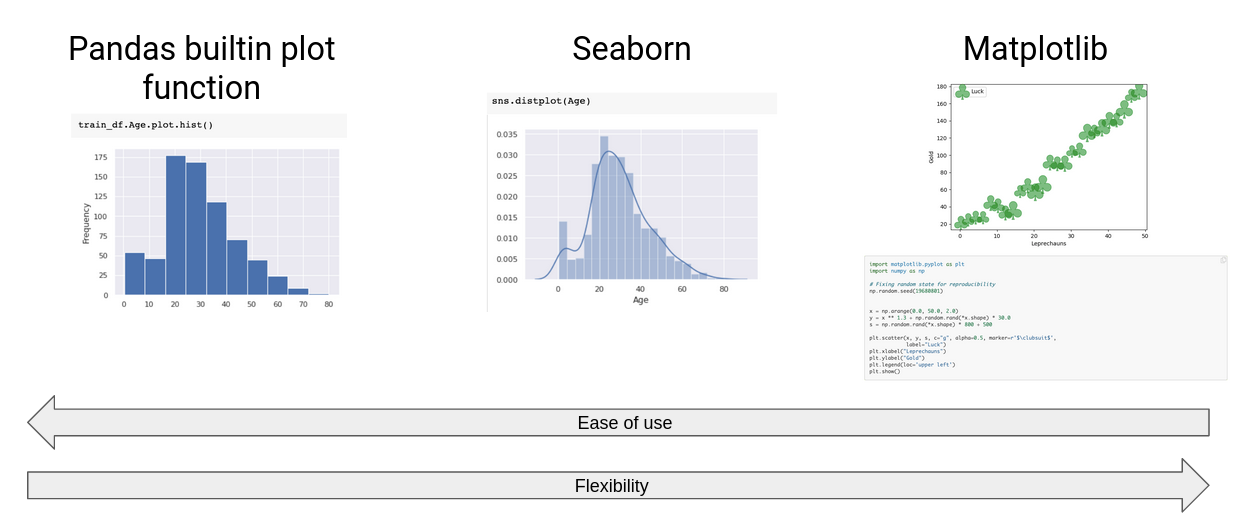

- **Matplotlib** is the oldest and most-widely used plotting library in python. You can customize all parts of it.

- **Seaborn** and **pandas builtin plot function** build on top of Matplotlib. They are easier to handle and give already very nice results. Both of them return matplotlib objects which can be further modified.


### Libraries


In [ ]:
import pandas as pd
import seaborn as sns       # plotting library
import matplotlib.pyplot as plt

## Loading the data
Get the data and get a first impression, how the data looks like and if everything was loaded correctly.

In [ ]:
#reading data
cars = pd.read_csv("https://raw.githubusercontent.com/juliandnl/redi_ss20/master/cars.csv")
cars.head()

,Make,Model,Year,Variant,Kms,Price,Doors,Kind,Location
0,Volkswagen,Vento,2012,2.5 Luxury 170cv,99950,360000,4.0,Sedán,Córdoba
1,Ford,Ranger,2012,2.3 Cd Xl Plus 4x2,140000,320000,2.0,Pick-Up,Entre Ríos
2,Volkswagen,Fox,2011,1.6 Trendline,132000,209980,5.0,Hatchback,Bs.as. G.b.a. Sur
3,Ford,Ranger,2017,3.2 Cd Xls Tdci 200cv Automática,13000,798000,4.0,Pick-Up,Neuquén
4,Volkswagen,Gol,2013,1.4 Power 83cv 3 p,107000,146000,3.0,Hatchback,Córdoba


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Make      10000 non-null  object 
 1   Model     10000 non-null  object 
 2   Year      10000 non-null  int64  
 3   Variant   10000 non-null  object 
 4   Kms       10000 non-null  int64  
 5   Price     10000 non-null  int64  
 6   Doors     10000 non-null  float64
 7   Kind      10000 non-null  object 
 8   Location  10000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 703.2+ KB


In [ ]:
cars.columns

Index(['Make', 'Model', 'Year', 'Variant', 'Kms', 'Price', 'Doors', 'Kind',
       'Location'],
      dtype='object')

After this step, we can conclude that the dataset contains the information of 10.000 cars. There are 9 different columns:

  - Make (Car brand, example: Ford)
  - Model (The Model of the Car, example: Focus)
  - Year (The Year in which the car was build, example: 2012)
  - Variant (The car model version showing the PS, example: 1.6 Trendline)
  - Kms (The kilometers the cars has been driven, example: 90000)
  - Price (The offered price for the car, example: 10000)
  - Doors (How many doors the car has, example: 4)
  - Kind (Type of car, example: Pick-Up)
  - Location (Where the car is located, example: Buenos Aires)

## Histograms - one variable

Histograms are a type of plot where you can look at the distribution of one variable.

In [ ]:
max(cars["Price"])/1e6

2.8

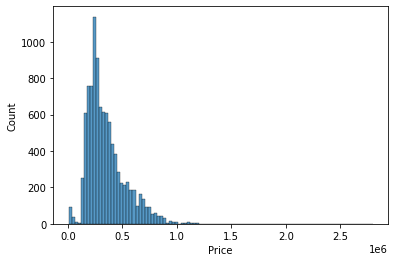

In [ ]:
sns.histplot(data=cars, x="Price", bins=100)

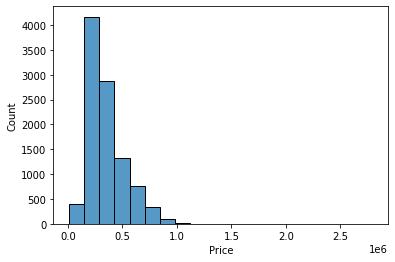

In [ ]:
sns.histplot(data=cars, x="Price", bins=20)

The number of bins defines the granularity how you inspect data. Sometimes it is very useful to inspect data with a very fine definition. Sometimes too many bins distract from the overall picture.

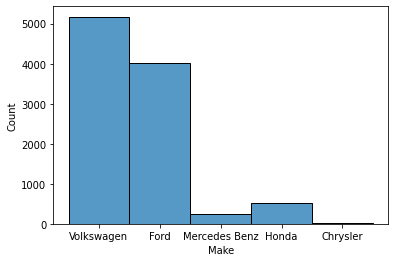

In [ ]:
sns.histplot(data=cars, x="Make")

When used on categorical data, such as "Make" or "Type", we get a graphical representation of a groupby.


In [ ]:
cars.groupby("Make").size()

Make
Chrysler           24
Ford             4025
Honda             522
Mercedes Benz     256
Volkswagen       5173
dtype: int64

With "hue" we can add an additional information bit to the picture. It splits all the data into different groups and displays each group separated by color.

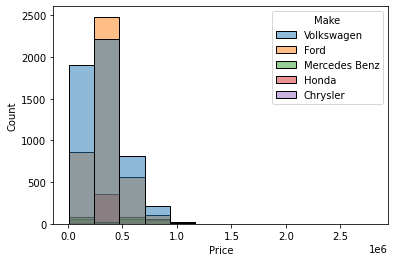

In [ ]:
sns.histplot(data=cars, x="Price", bins=12, hue="Make")

Do you find this representation useful? No, because by layering the bars the
colors cannot be distingushed properly anymore. This can lead to misinterpretation of the data.

The parameter 'multiple' can take different values: “layer”, “dodge”, “stack”, “fill”. I helps to distinguish the color-groups better.

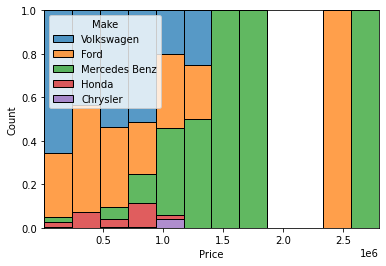

In [ ]:
sns.histplot(data=cars, x="Price", bins=12, hue="Make", multiple="fill")

Learnings from the data?
- most cars come from Volkswagen and Ford
- price ranges from 0 to 2.8 Mio Pesos,
- Mercedes is most expensive
- Volskwagen and Ford are rather cheap cars compared to the others

### Plotting structure

The basic <span style="color:blue"> structure of a plot</span> command in seaborn follows this structure:

```
sns.<type of plot>( data = <data frame>, x=<variable to plot>, hue=<group by>, <some more parameters> )
```

An example:
```
sns.histplot( data = cars, x="Price", hue="Make", bins=8 )
```

### Histogram Exercise:

In [ ]:
# reminder
cars.columns

Index(['Make', 'Model', 'Year', 'Variant', 'Kms', 'Price', 'Doors', 'Kind',
       'Location', 'age'],
      dtype='object')

In [ ]:
# reminder
cars.columns

cars["age"] = 2022-cars["Year"]
cars["km_per_year"] = cars["Kms"]/cars["age"]

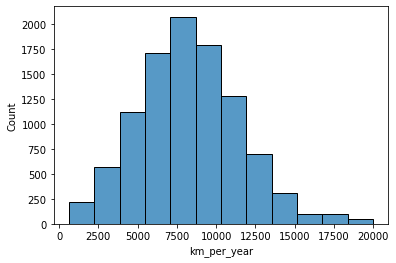

In [ ]:
sns.histplot( data = cars, x="km_per_year", bins=12 )

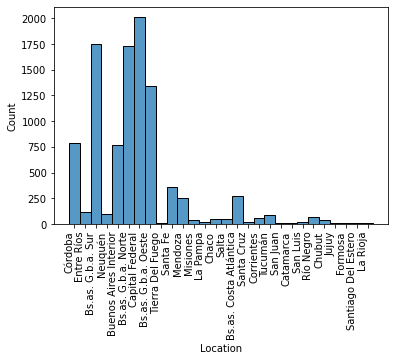

In [ ]:
sns.histplot( data = cars, x="Location")
_ = plt.xticks(rotation=90, ha='right')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


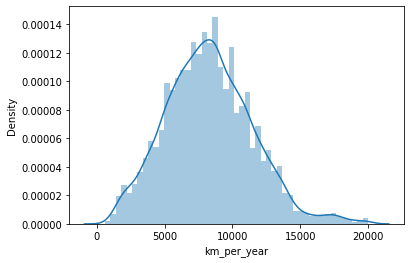

In [ ]:
sns.distplot(cars["km_per_year"] )

Exercise: Plot distributions with Kms and Year. What do you learn from the data?

Which other distributions would be interesting to look at?






## Scatterplots - 2 variables
Scatterplots display the relationship between two dimensions in your data (=columns).

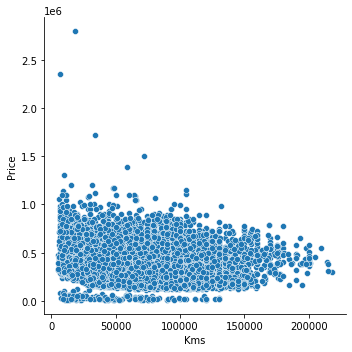

In [ ]:
# scatter plot in seaborn
sns.relplot(
    data=cars,
    x="Kms", y="Price"
    )

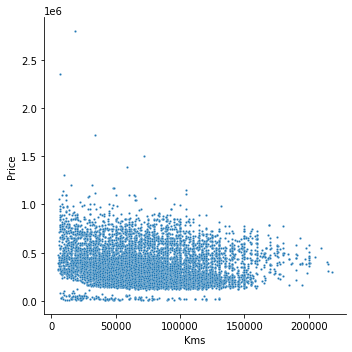

In [ ]:
# adjust marker size with s
g = sns.relplot(
    data=cars,
    x="Kms", y="Price", s=5
    )


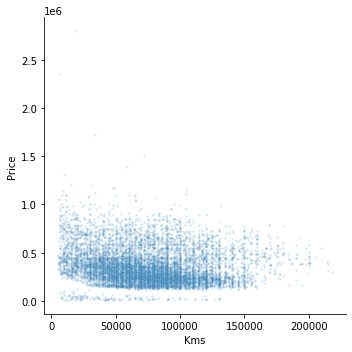

In [ ]:
# adjust marker size with s
g = sns.relplot(
    data=cars,
    x="Kms", y="Price", s=5, alpha=0.2
    )

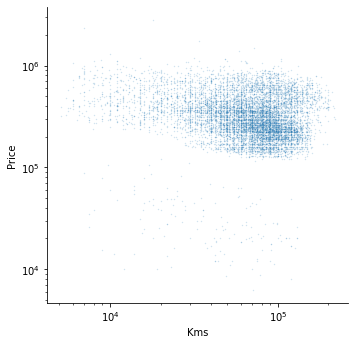

In [ ]:
g = sns.relplot(
    data=cars,
    x="Kms", y="Price",
    s=2, alpha=0.2
    )
g.set( xscale="log", yscale="log")

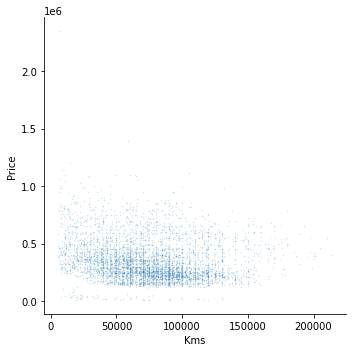

In [ ]:
g = sns.relplot(
    data=cars[:5000],
    x="Kms", y="Price",
    s=2, alpha=0.2
    )


Still the data is obscured. Any ideas to help with that?


### Exercise
What else would be interesting to look at, e.g. a different "hue"? Did you expect what you see?

In [ ]:
cars.columns

Index(['Make', 'Model', 'Year', 'Variant', 'Kms', 'Price', 'Doors', 'Kind',
       'Location', 'age', 'km_per_year'],
      dtype='object')

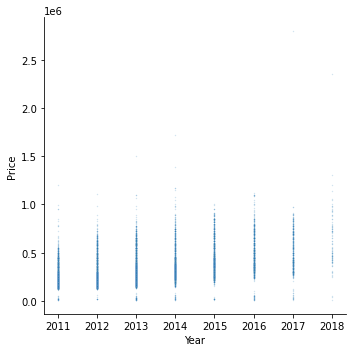

In [ ]:
g = sns.relplot(
    data=cars,
    x="Year", y="Price",
    s=2, alpha=0.2
    )


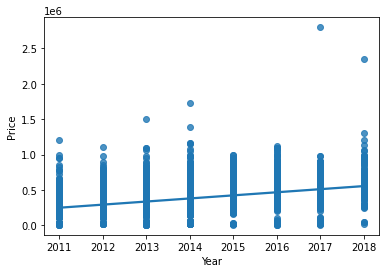

In [ ]:
g = sns.regplot(
    data=cars,
    x="Year", y="Price"
    )

In [ ]:
from scipy.stats import pearsonr
pearsonr(cars.Year, cars.Price)

(0.4472384700493309, 0.0)

In [ ]:
cars.groupby("Year").size()

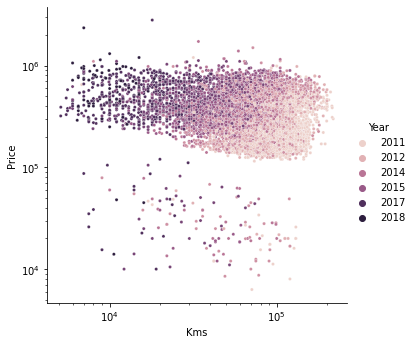

In [ ]:
g=sns.relplot(
    data=cars,
    x="Kms", y="Price", hue="Year",
    s=10
    )
g.set( xscale="log", yscale="log")

- Older cars have more kilometers.
- The higher the price the younger the car.

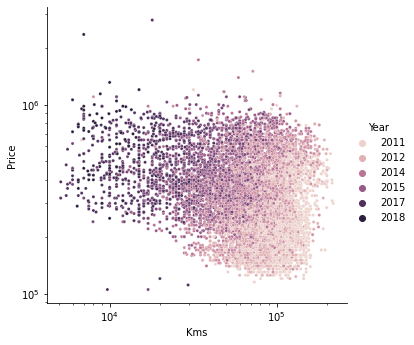

In [ ]:
g=sns.relplot(
    data=cars[cars["Price"]>10**5],
    x="Kms", y="Price", hue="Year",
    s=10
    )
g.set( xscale="log", yscale="log")

In [ ]:
cars.columns

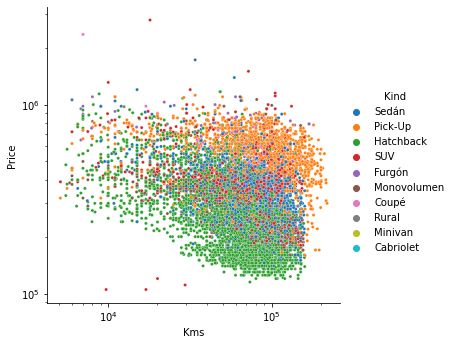

In [ ]:
g=sns.relplot(
    data=cars[cars["Price"]>10**5],
    x="Kms", y="Price", hue="Kind",
    s=10
    )
g.set( xscale="log", yscale="log")

What happens if you plot x="Make", y="Price"?

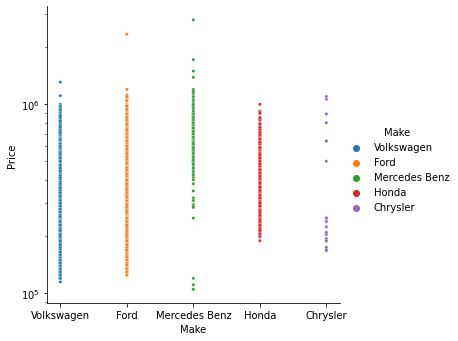

In [ ]:
g=sns.relplot(
    data=cars[cars["Price"]>10**5],
    x="Make", y="Price", hue="Make",
    s=10
    )
g.set(  yscale="log")

When categorical data is put into a scatterplot the dots align at one line. We cannot distinguish them and we do not see areas with a lot of dots. To overcome this it is better to use different plots such as [violin plots](https://en.wikipedia.org/wiki/Violin_plot), [box plots](https://en.wikipedia.org/wiki/Box_plot) or bee swarm plot.



[None]

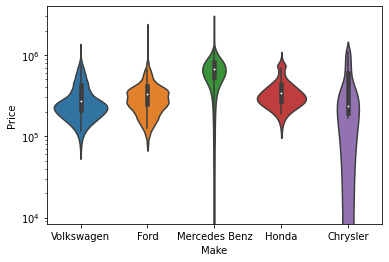

In [ ]:
g=sns.violinplot(
    data=cars[cars["Price"]>10**5],
    x="Make", y="Price",
    s=10
    )
g.set(  yscale="log")

[None]

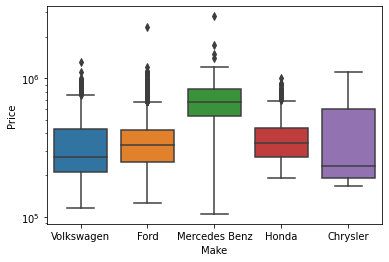

In [ ]:
g=sns.boxplot(
    data=cars[cars["Price"]>10**5],
    x="Make", y="Price"
    )
g.set(  yscale="log")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 59.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 53.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[None]

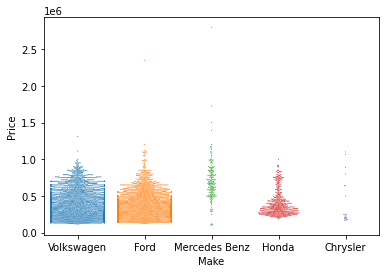

In [ ]:
sns.swarmplot(
    data=cars[cars["Price"]>10**5],
    x="Make", y="Price", s=1
    )
g.set(  yscale="log")

[None]

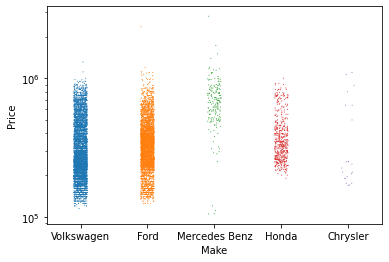

In [ ]:
g=sns.stripplot(
    data=cars[cars["Price"]>10**5],
    x="Make", y="Price", s=1
    )
g.set(  yscale="log")

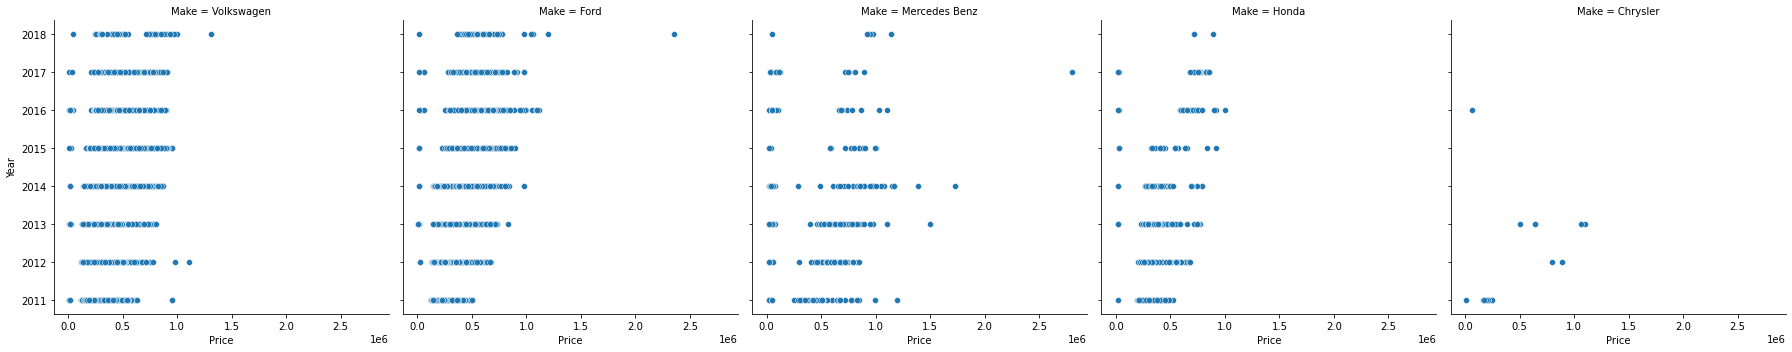

In [ ]:
sns.relplot(data=cars, x="Price", y="Year", col="Make")

## Complete overview

Pairplot provides a quick glance of the data.

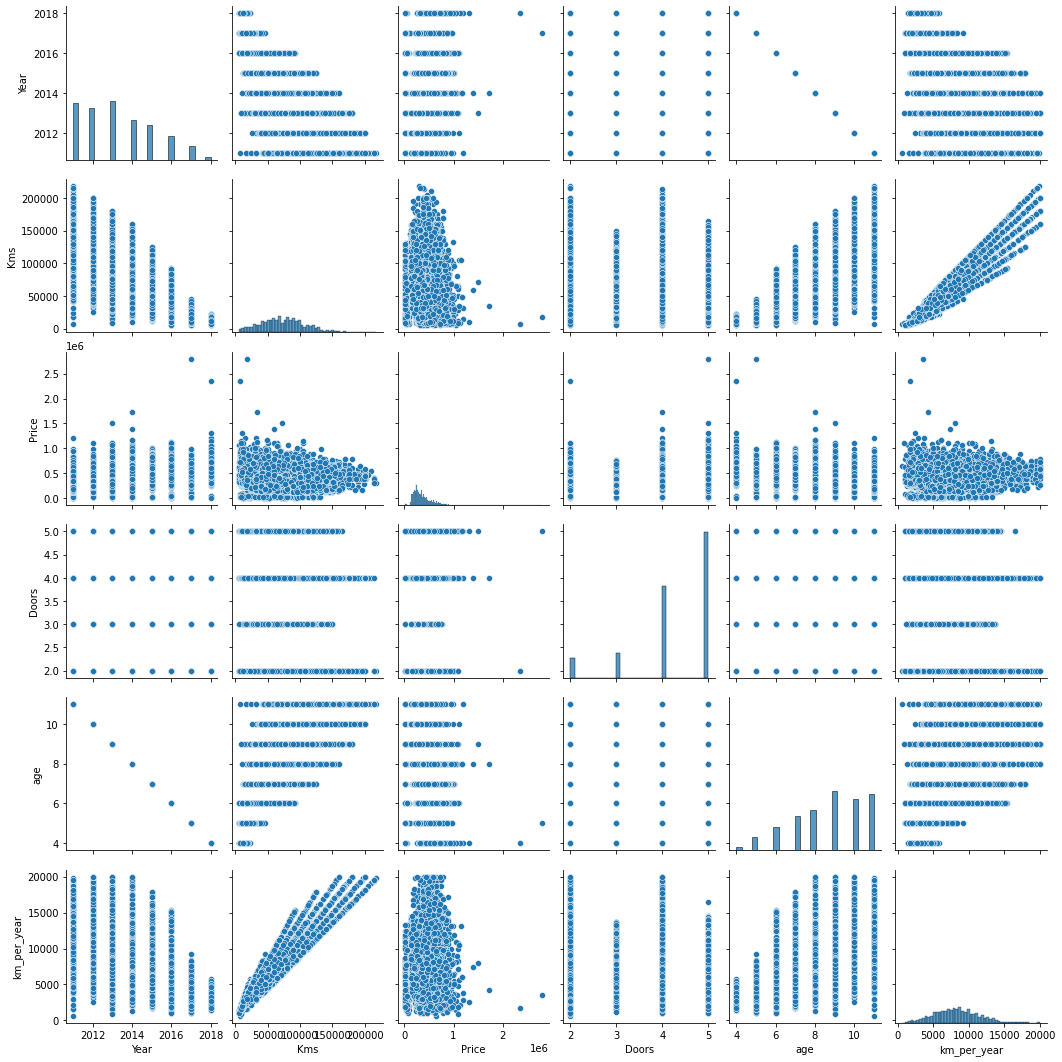

In [ ]:
sns.pairplot(cars)

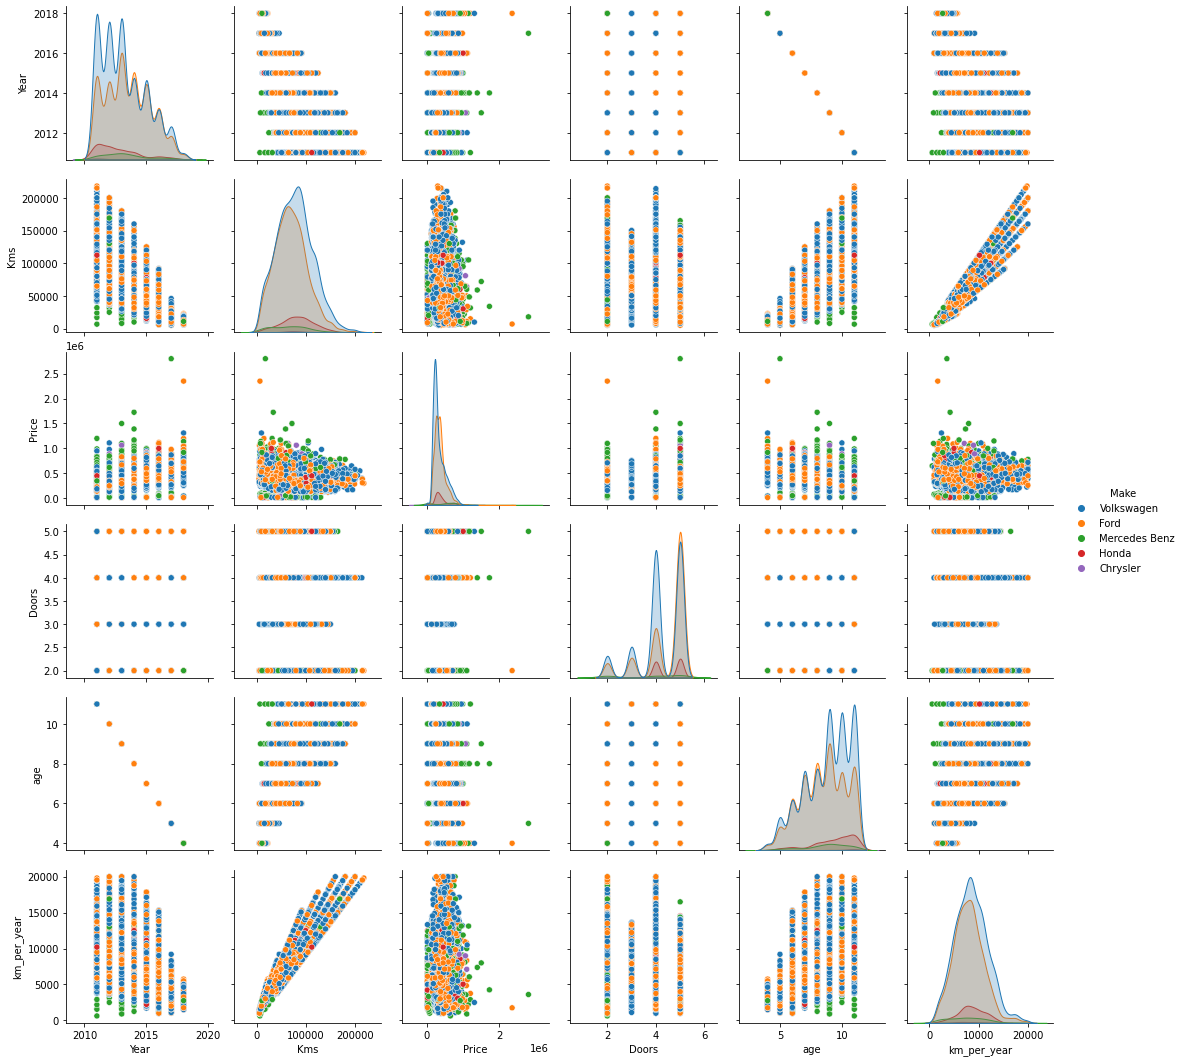

In [ ]:
sns.pairplot(cars, hue='Make')

## A secret in the data?

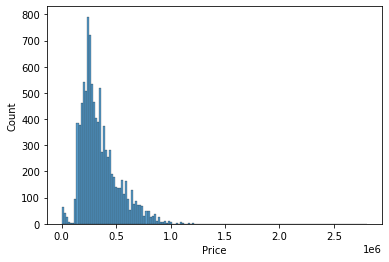

In [ ]:
# scatter plot in seaborn
sns.histplot(
    data=cars,
    x="Price"
    )

We see that some of the cars have a very low price. That is suspicious. Where does it come from? We will investigate.....

IDEA:
- set a flag between normal prices and strange prices
- investigate if we can a pattern which is different among the groups.


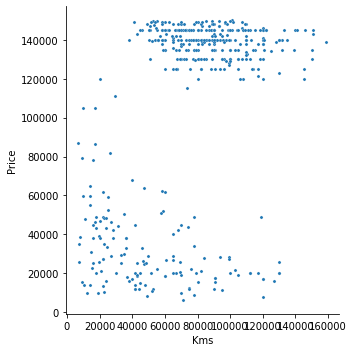

In [ ]:
# Find visually a threshold to set a flag to in
sns.relplot(
    data=cars[cars["Price"]<150000],
    x="Kms", y="Price",
    s=10
    )

In [ ]:
cars.columns

Index(['Make', 'Model', 'Year', 'Variant', 'Kms', 'Price', 'Doors', 'Kind',
       'Location', 'age', 'km_per_year'],
      dtype='object')

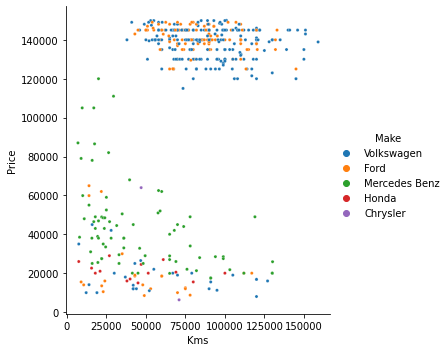

In [ ]:

sns.relplot(
    data=cars[cars["Price"]<150000],
    x="Kms", y="Price", hue='Make',
    s=10
    )

In [ ]:
cars.groupby('Make')['Price'].median()

Make
Chrysler         217500.0
Ford             330000.0
Honda            333750.0
Mercedes Benz    575000.0
Volkswagen       270000.0
Name: Price, dtype: float64

In [ ]:
# Find visually a threshold to set a flag to in
below_100000 = cars['Price'] < 100000
cars['price_below_100000'] = below_100000

In [ ]:
cars.groupby(['price_below_100000', 'Make']).size()

price_below_100000  Make         
False               Chrysler           22
                    Ford             4003
                    Honda             508
                    Mercedes Benz     183
                    Volkswagen       5146
True                Chrysler            2
                    Ford               22
                    Honda              14
                    Mercedes Benz      73
                    Volkswagen         27
dtype: int64

In [ ]:
# we want to normalize the data
variable_to_investigate = "Make"

grouped_cars = cars.groupby(["price_below_100000", variable_to_investigate]).size().reset_index(name="counts")
s = cars.price_below_100000.value_counts()
grouped_cars["normalized_counts"] = grouped_cars["counts"].div(grouped_cars["price_below_100000"].map(s))

In [ ]:
grouped_cars

,price_below_100000,Make,counts,normalized_counts
0,False,Chrysler,22,0.002231
1,False,Ford,4003,0.405901
2,False,Honda,508,0.051511
3,False,Mercedes Benz,183,0.018556
4,False,Volkswagen,5146,0.521801
5,True,Chrysler,2,0.014493
6,True,Ford,22,0.159420
7,True,Honda,14,0.101449
8,True,Mercedes Benz,73,0.528986
9,True,Volkswagen,27,0.195652


In the group with the odd prices Mercedes Benz is highly overrepresented. When looking at the scatter plot grouped by Make we find that Mercedes Benz cars have unusually low prices. 100,000 Argentinian Pesos is a real bargain for a Mercedes Benz which has less than 25,000 km. Most likely the data is not correct here and the prices for Mercedes Benz are displayed in Euro.

## Time series

Time series plots a signal vs. time. Our cars data has no information which can be displayed by a timeseries. Therefore we get new data.

Possible applications:
- Customers per time
- Purchases per time

In [ ]:
fmri = sns.load_dataset("fmri")

In [ ]:
fmri.head()

fmri stands for functional Magnet Resonance Imaging. Every row is a measurement
- Subjects are patients
- timepoints within one measurement
- event, region more description how and where the measruement was performed
- the actual signal of the measurement


In [ ]:
sns.lineplot(data=fmri, x="timepoint", y="signal")

The signal is displayed by the line. Every time point we have several measurements. The range is indicated by the area.